In [1]:
from util import setup_notebook
setup_notebook()
%load_ext autoreload
%autoreload 2

In [2]:
import altair as alt
import pandas as pd
from testmining.apfd import read_tests

In [3]:
df = read_tests('../output/square@okhttp/baseline/okhttp@untreated.csv')
df.head()

,travisJobId,testName,index,duration,count,failures,errors,skipped,red
0,119049204,okhttp3.mockwebserver.MockWebServerTest,0,9.749,24,1,0,0,1
1,119049204,okhttp3.mockwebserver.CustomDispatcherTest,1,0.001,2,0,0,0,0
2,128577751,okhttp3.mockwebserver.CustomDispatcherTest,0,0.129,2,0,0,0,0
3,128577751,okhttp3.mockwebserver.MockWebServerTest,1,5.885,25,0,0,0,0
4,128577751,okhttp3.internal.huc.URLEncodingTest,2,0.024,2,0,0,2,0


In [4]:
redJobs = df[df.red > 0].groupby('travisJobId').agg({'red': 'sum'}).sort_values(by='red', ascending=False)
redJobs.head()

,red
travisJobId,
24460338,409
24391070,409
24428839,409
24369394,299
24368130,299


In [5]:
mostRed = df[df.red > 0].groupby('travisJobId').agg('size').sort_values(ascending=False)
pd.DataFrame(mostRed).head()

,0
travisJobId,
24391070,12
24368130,11
24460338,11
24369394,11
24428839,11


In [6]:
df[(df.travisJobId == 24391070) & (df.red > 0)]

,travisJobId,testName,index,duration,count,failures,errors,skipped,red
7553,24391070,com.squareup.okhttp.CacheTest,8,0.266,115,0,111,0,111
7557,24391070,com.squareup.okhttp.internal.http.HttpOverHttp...,12,0.025,22,0,20,2,20
7558,24391070,com.squareup.okhttp.internal.http.HttpOverSpdy...,13,0.008,20,0,18,2,18
7559,24391070,com.squareup.okhttp.internal.http.URLConnectio...,14,1.092,192,0,156,8,156
7560,24391070,com.squareup.okhttp.internal.http.ThreadInterr...,15,0.000,2,0,2,0,2
7562,24391070,com.squareup.okhttp.internal.http.DisconnectTest,17,0.000,2,0,2,0,2
7563,24391070,com.squareup.okhttp.internal.http.CookiesTest,18,0.001,8,0,8,0,8
7567,24391070,com.squareup.okhttp.internal.huc.CacheAdapterTest,22,0.000,5,0,5,0,5
7568,24391070,com.squareup.okhttp.internal.huc.ResponseCache...,23,0.053,86,0,83,0,83
7569,24391070,com.squareup.okhttp.internal.huc.JavaApiConver...,24,0.103,23,0,2,0,2


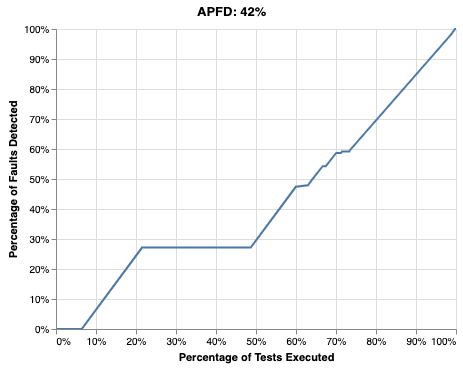

In [7]:
from testmining.apfd_job_plot import job_plot_test
job_plot_test(use_title=True)

In [8]:
from testmining.apfd import from_file
af = from_file('../output/square@okhttp/baseline/okhttp@untreated.csv').to_frame().reset_index().rename(columns={
    0: 'apfd'
})
af.head()

,travisJobId,apfd
0,2685384,0.820144
1,2697352,0.701510
2,2820645,0.825784
3,2923196,0.826389
4,2923220,0.826389


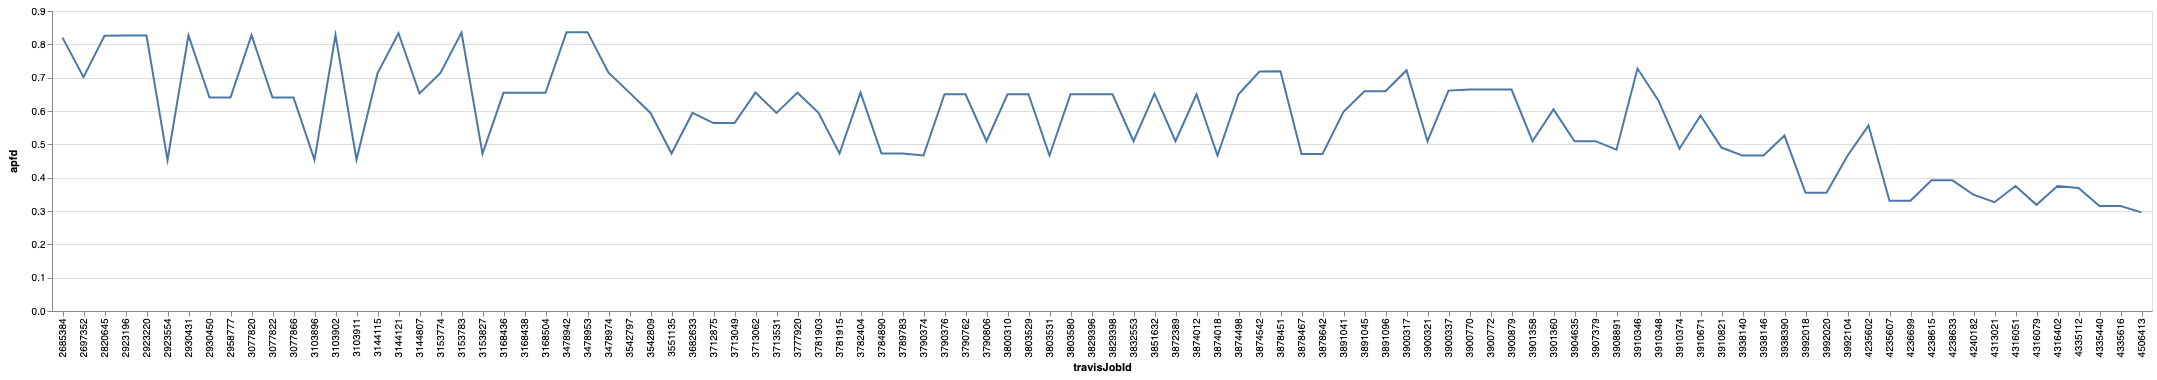

In [9]:
alt.Chart(af.head(100)).mark_line().encode(
    x=alt.X('travisJobId:O'),
    y=alt.Y('apfd'))